In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn
import matplotlib.pyplot as plt
import talib

#### Load and prepare the data.

In [4]:
data = pd.read_csv('../data/GOOG_historical_data.csv')
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5020 non-null   object 
 1   Open          5020 non-null   float64
 2   High          5020 non-null   float64
 3   Low           5020 non-null   float64
 4   Close         5020 non-null   float64
 5   Adj Close     5020 non-null   float64
 6   Volume        5020 non-null   int64  
 7   Dividends     5020 non-null   float64
 8   Stock Splits  5020 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 353.1+ KB
None


In [6]:
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [9]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
print(data.info())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5020 non-null   datetime64[ns]
 1   Open          5020 non-null   float64       
 2   High          5020 non-null   float64       
 3   Low           5020 non-null   float64       
 4   Close         5020 non-null   float64       
 5   Adj Close     5020 non-null   float64       
 6   Volume        5020 non-null   int64         
 7   Dividends     5020 non-null   float64       
 8   Stock Splits  5020 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 353.1 KB
None
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


#### Apply Analysis Indicators with TA-Lib

In [18]:
# Simple Moving Average (SMA)
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)

# Exponential Moving Average (EMA)
data['EMA_20'] = talib.EMA(data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)

# Moving Average Convergence Divergence (MACD)
data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

data = data.dropna()

print(data[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].head())

          Date     Close    SMA_20    EMA_20        RSI      MACD  \
198 2005-06-02  7.170623  6.143012  6.248639  92.836838  0.464466   
199 2005-06-03  6.980336  6.209363  6.318325  81.863619  0.465250   
200 2005-06-06  7.246339  6.287720  6.406707  84.603320  0.481782   
201 2005-06-07  7.300635  6.371281  6.491843  85.098154  0.493575   
202 2005-06-08  6.962901  6.435740  6.536706  70.022934  0.470248   

     MACD_signal  MACD_hist  
198     0.360438   0.104028  
199     0.381401   0.083849  
200     0.401477   0.080305  
201     0.419897   0.073678  
202     0.429967   0.040281  


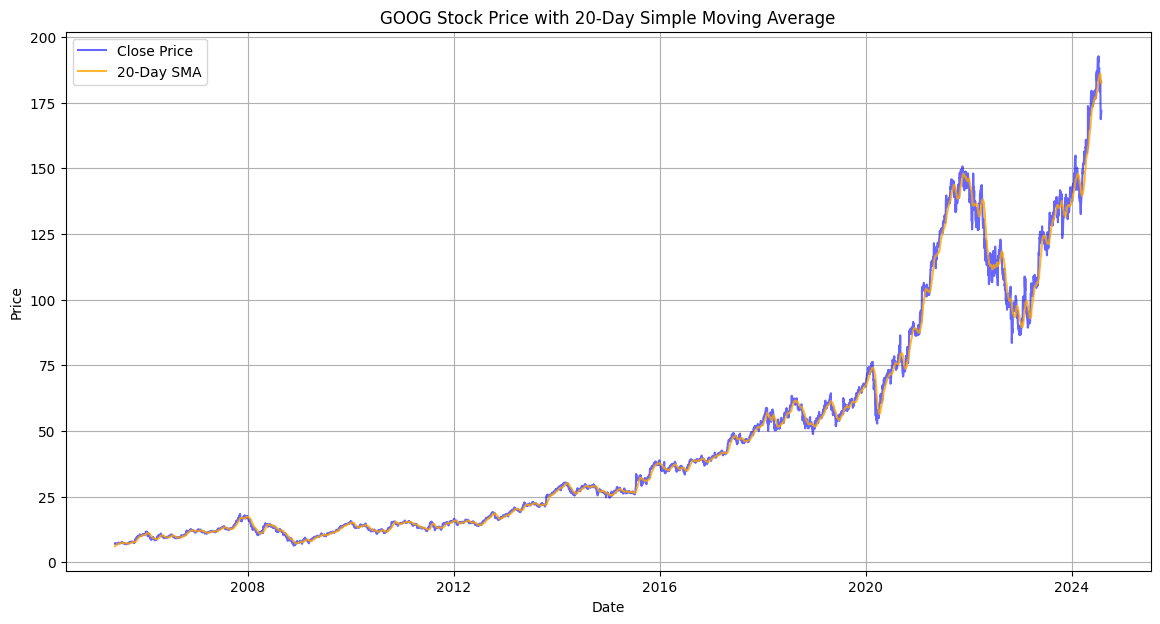

In [19]:
plt.figure(figsize=(14, 7))

# Plot the Close price
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.6)

# Plot the SMA
plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA', color='orange', alpha=0.8)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GOOG Stock Price with 20-Day Simple Moving Average')

# Show legend
plt.legend()

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()


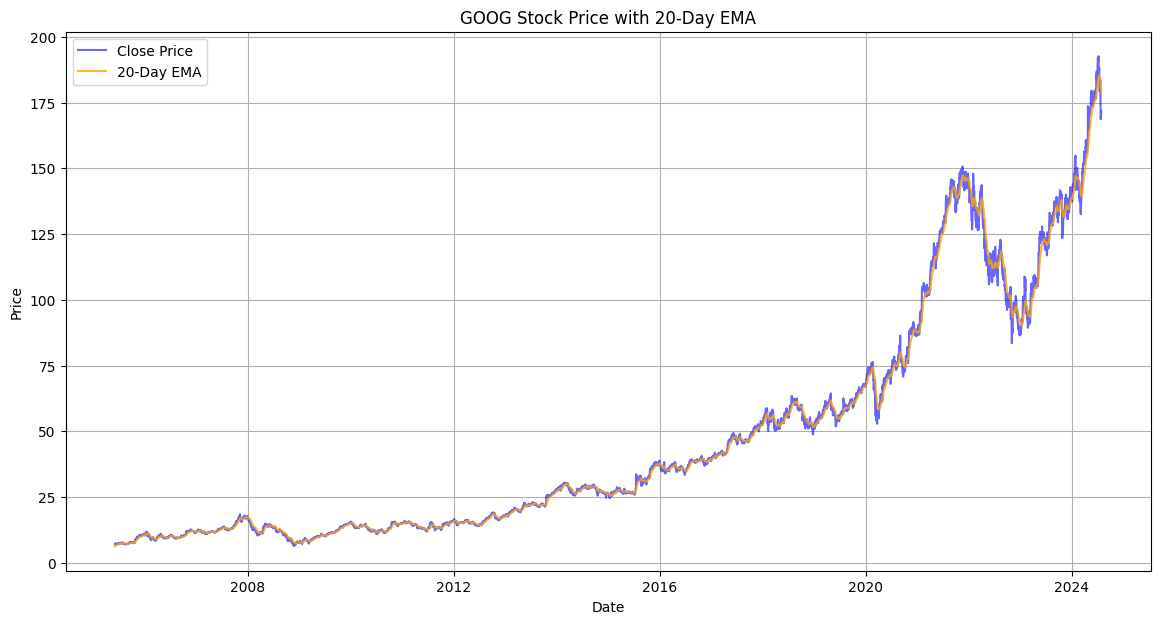

In [21]:
# Plot Close Price and EMA
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['Date'], data['EMA_20'], label='20-Day EMA', color='orange', alpha=0.8)
plt.title('GOOG Stock Price with 20-Day EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

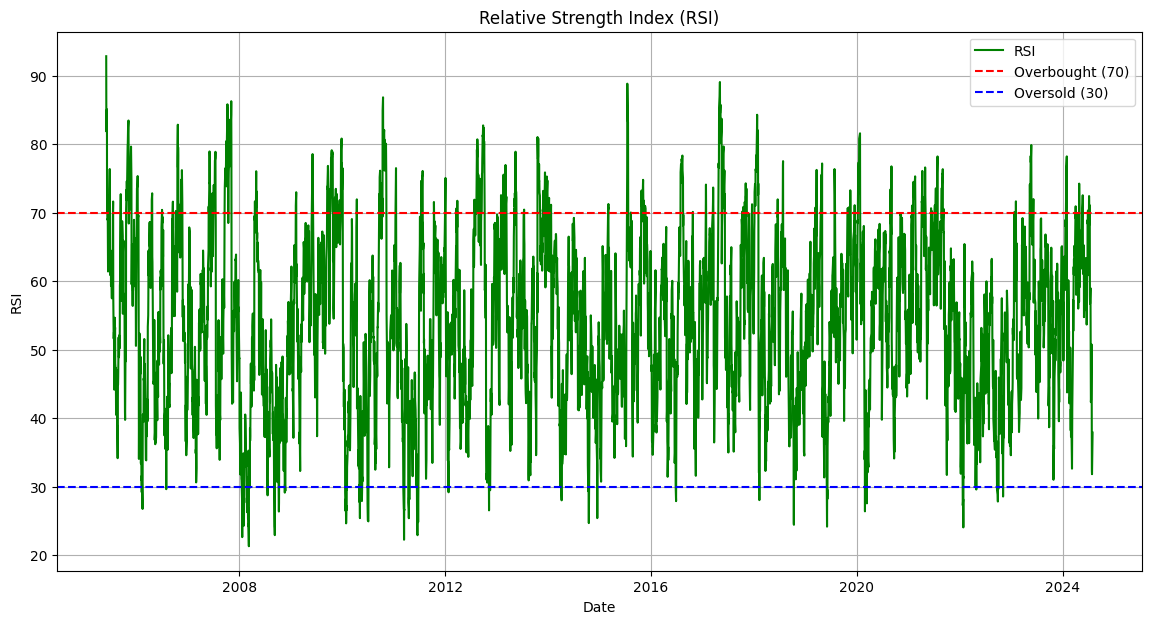

In [23]:

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['RSI'], label='RSI', color='green')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='blue', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

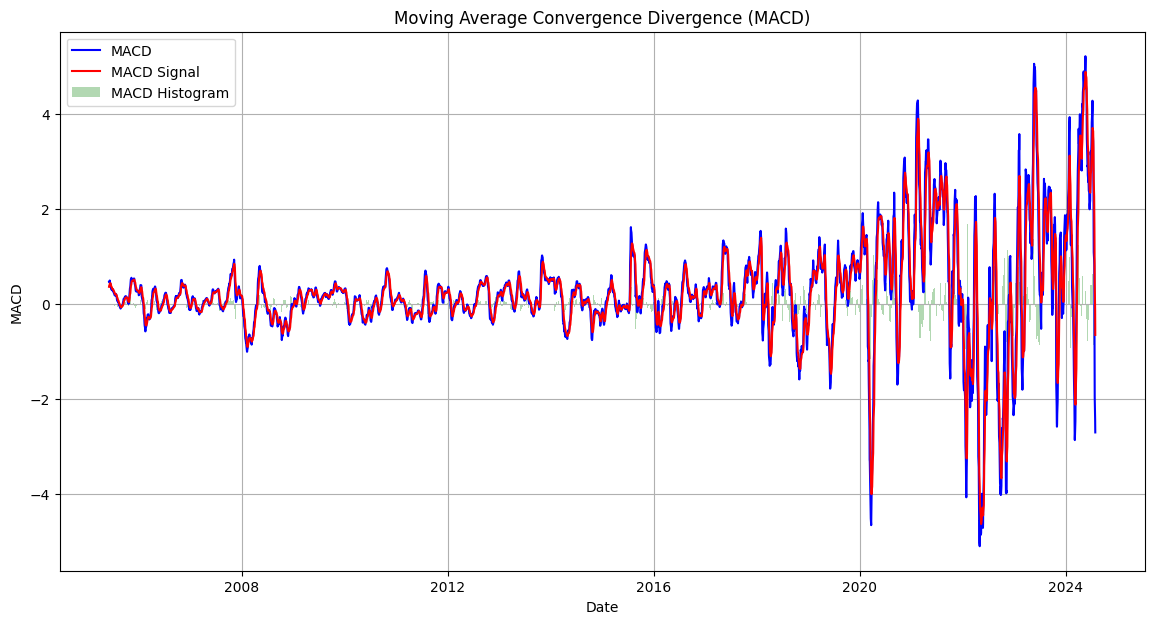

In [28]:
# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['MACD'], label='MACD', color='blue')
plt.plot(data['Date'], data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(data['Date'], data['MACD_hist'], label='MACD Histogram', color='green', alpha=0.3)
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

#### PyNance for Financial Metrics